# Part 2: Image Classification with Deep Learning

#### 2. Explain in your own words:


**a. Gradient Descent:**

GD is an optimizing algorithm that finds the ideal solution by minimizing the loss function, by consecutively changing the model’s parameters towards the steepest gradient. The algorithm determines the degree of change (partial derivatives) of each parameter by the function of the degree of error and modifies the parameters in proportional amounts in order to decrease the error.

**b. List 3 regularization techniques and explain:**

1. *L1 Regularization (Lasso Regression):*
A penalty term proportional to the absolute value of the model’s weight is added to the loss function which reduces the magnitude of weights or getting to zero, resulting in removing features.

2. *L2 Regularization (Ridge Regression):*
A penalty term proportional to square of the model’s weight is added to the loss function which reduces the magnitude of weights, resulting in removing features.

3. *Dropout:*
Random set of neurons are shut off to train the model which helps in preventing overfitting by forcing model tolearn from different set of neurons and decreasing dependency on a certain feature. These neurons to drop are randomly chosen on the basis of drop out ratio.

**c. Activation functions:**

Activation function introduces non-linearity in the neural network by allowing them to learn intricate patterns. It takes input and converts the output into a certain range so that it can be used in backpropogation. There are many type sof activation function,some of them are:
1. Sigmoid
2. ReLU
3. Tanh
4. Softmax
5. ELU
6. PReLU

The activation function will activate the neurons

**d. Loss function and Back Propagation:**

*Loss Function:*
Loss function is the measure of calculating the difference between the actual value and the predicted value. For example 
Regression- Mean Squared Error (MSE)
Classification- Cross-Entropy

*Back Propagation:*
It is an algorithm to calculate gradients of the loss function layer by layer from output to input using the chain of rule, adjusting the weights and biases of the neural network to minimize the loss function.
Steps of calculating back-propagation is:
1. Initiate weights and biases randomly.
2.  Calculate forward pass by multiplying each input by its corresponding weights and adding biases,passing through the activation function to calculate predicted output.
3. Calculate error by finding the difference between actual and predicted value
4. Backward pass- Find gradients of the loss function with respect to each parameter from output to input by chain of rule.
5. update weights by subtracting weights by (learning rate * gradient descent) and repeat again.

**e. Epochs, Iterations, and Batch size:**

*Epochs:* The number of times the model is run on the entire dataset.

*Iteration:* Iterations is the number of batches needed to complete one epoch.

*Batch size:* Total number of training examples present in a single batch.

#### 3. Visualize/summarize the data

In [ ]:
%pip install pandas matplotlib pillow scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 48.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 50.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 42.0 MB/s eta 0:00:0000:0

In [ ]:
#installing libraries
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F


#### a.Number of images in the training and testing set and number of classes in the target variable

In [ ]:
#Loading training and testing data
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

#Number of images in the training and testing set
print("Number of images in training set:", len(train_df))
print("Number of images in testing set:", len(test_df))

#Number of classes in the target variable
print("\nClasses:", train_df['label'].unique())
print("Number of classes:", train_df['label'].nunique())

Number of images in training set: 8227
Number of images in testing set: 2056

Classes: ['Badminton' 'Cricket' 'Tennis' 'Swimming' 'Soccer' 'Wrestling' 'Karate']
Number of classes: 7


In [ ]:
#First five rows of the training dataset to get an overview of the data
train_df.head()

image_ID      label
0  7c225f7b61.jpg  Badminton
1         b31.jpg  Badminton
2  acb146546c.jpg  Badminton
3  0e62f4d8f2.jpg  Badminton
4  cfd2c28c74.jpg    Cricket

In [ ]:
#Last five rows of the training dataset
test_df.head()

image_ID
0  f5e13966e7.jpg
1  6674191b4e.jpg
2  91b5f8b7a9.jpg
3  393119b6d6.jpg
4  1ce5f81578.jpg

#### b. Number of images per class

Number of images per class:
label
Cricket      1556
Wrestling    1471
Tennis       1445
Badminton    1394
Soccer       1188
Swimming      595
Karate        578
Name: count, dtype: int64


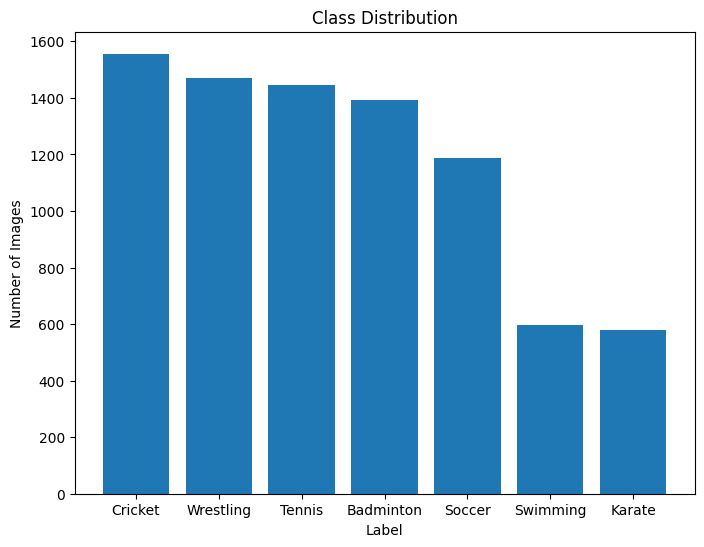

In [ ]:
#Count of images per class
label_counts = train_df['label'].value_counts()

print("Number of images per class:")
print(label_counts)

# Plot a bar chart to visualize the class distribution
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

#### c. Number of pixels in the first 2 images of each class

In [ ]:
# Load the first 2 images of each class
for label in train_df['label'].unique():
    label_df = train_df[train_df['label'] == label]
    image_ids = label_df['image_ID'].tolist()[:2]

    #Load the selected images and displap
    for image_id in image_ids:
        img_path = os.path.join('dataset', 'train', image_id)
        img = Image.open(img_path)
        width, height = img.size

        print(f"Label: {label}, Image: {image_id}, Height: {height}, Width: {width}")

Label: Badminton, Image: 7c225f7b61.jpg, Height: 285, Width: 380
Label: Badminton, Image: b31.jpg, Height: 172, Width: 268
Label: Cricket, Image: cfd2c28c74.jpg, Height: 900, Width: 1200
Label: Cricket, Image: cdddf0986c.jpg, Height: 1152, Width: 2048
Label: Tennis, Image: e06a27208d.jpg, Height: 168, Width: 299
Label: Tennis, Image: 70932bc9b7.jpg, Height: 168, Width: 300
Label: Swimming, Image: da4d3e218c.jpg, Height: 194, Width: 259
Label: Swimming, Image: 84f0137b10.jpg, Height: 720, Width: 1280
Label: Soccer, Image: 9ec9dbc59a.jpg, Height: 168, Width: 300
Label: Soccer, Image: 17bf27328c.jpg, Height: 188, Width: 268
Label: Wrestling, Image: 772648a478.jpg, Height: 788, Width: 1400
Label: Wrestling, Image: 89ce36a3ec.jpg, Height: 576, Width: 1024
Label: Karate, Image: c7657216ce.jpg, Height: 168, Width: 300
Label: Karate, Image: 8116da71f7.jpg, Height: 183, Width: 275


###### d. Display at least 3 images of each class

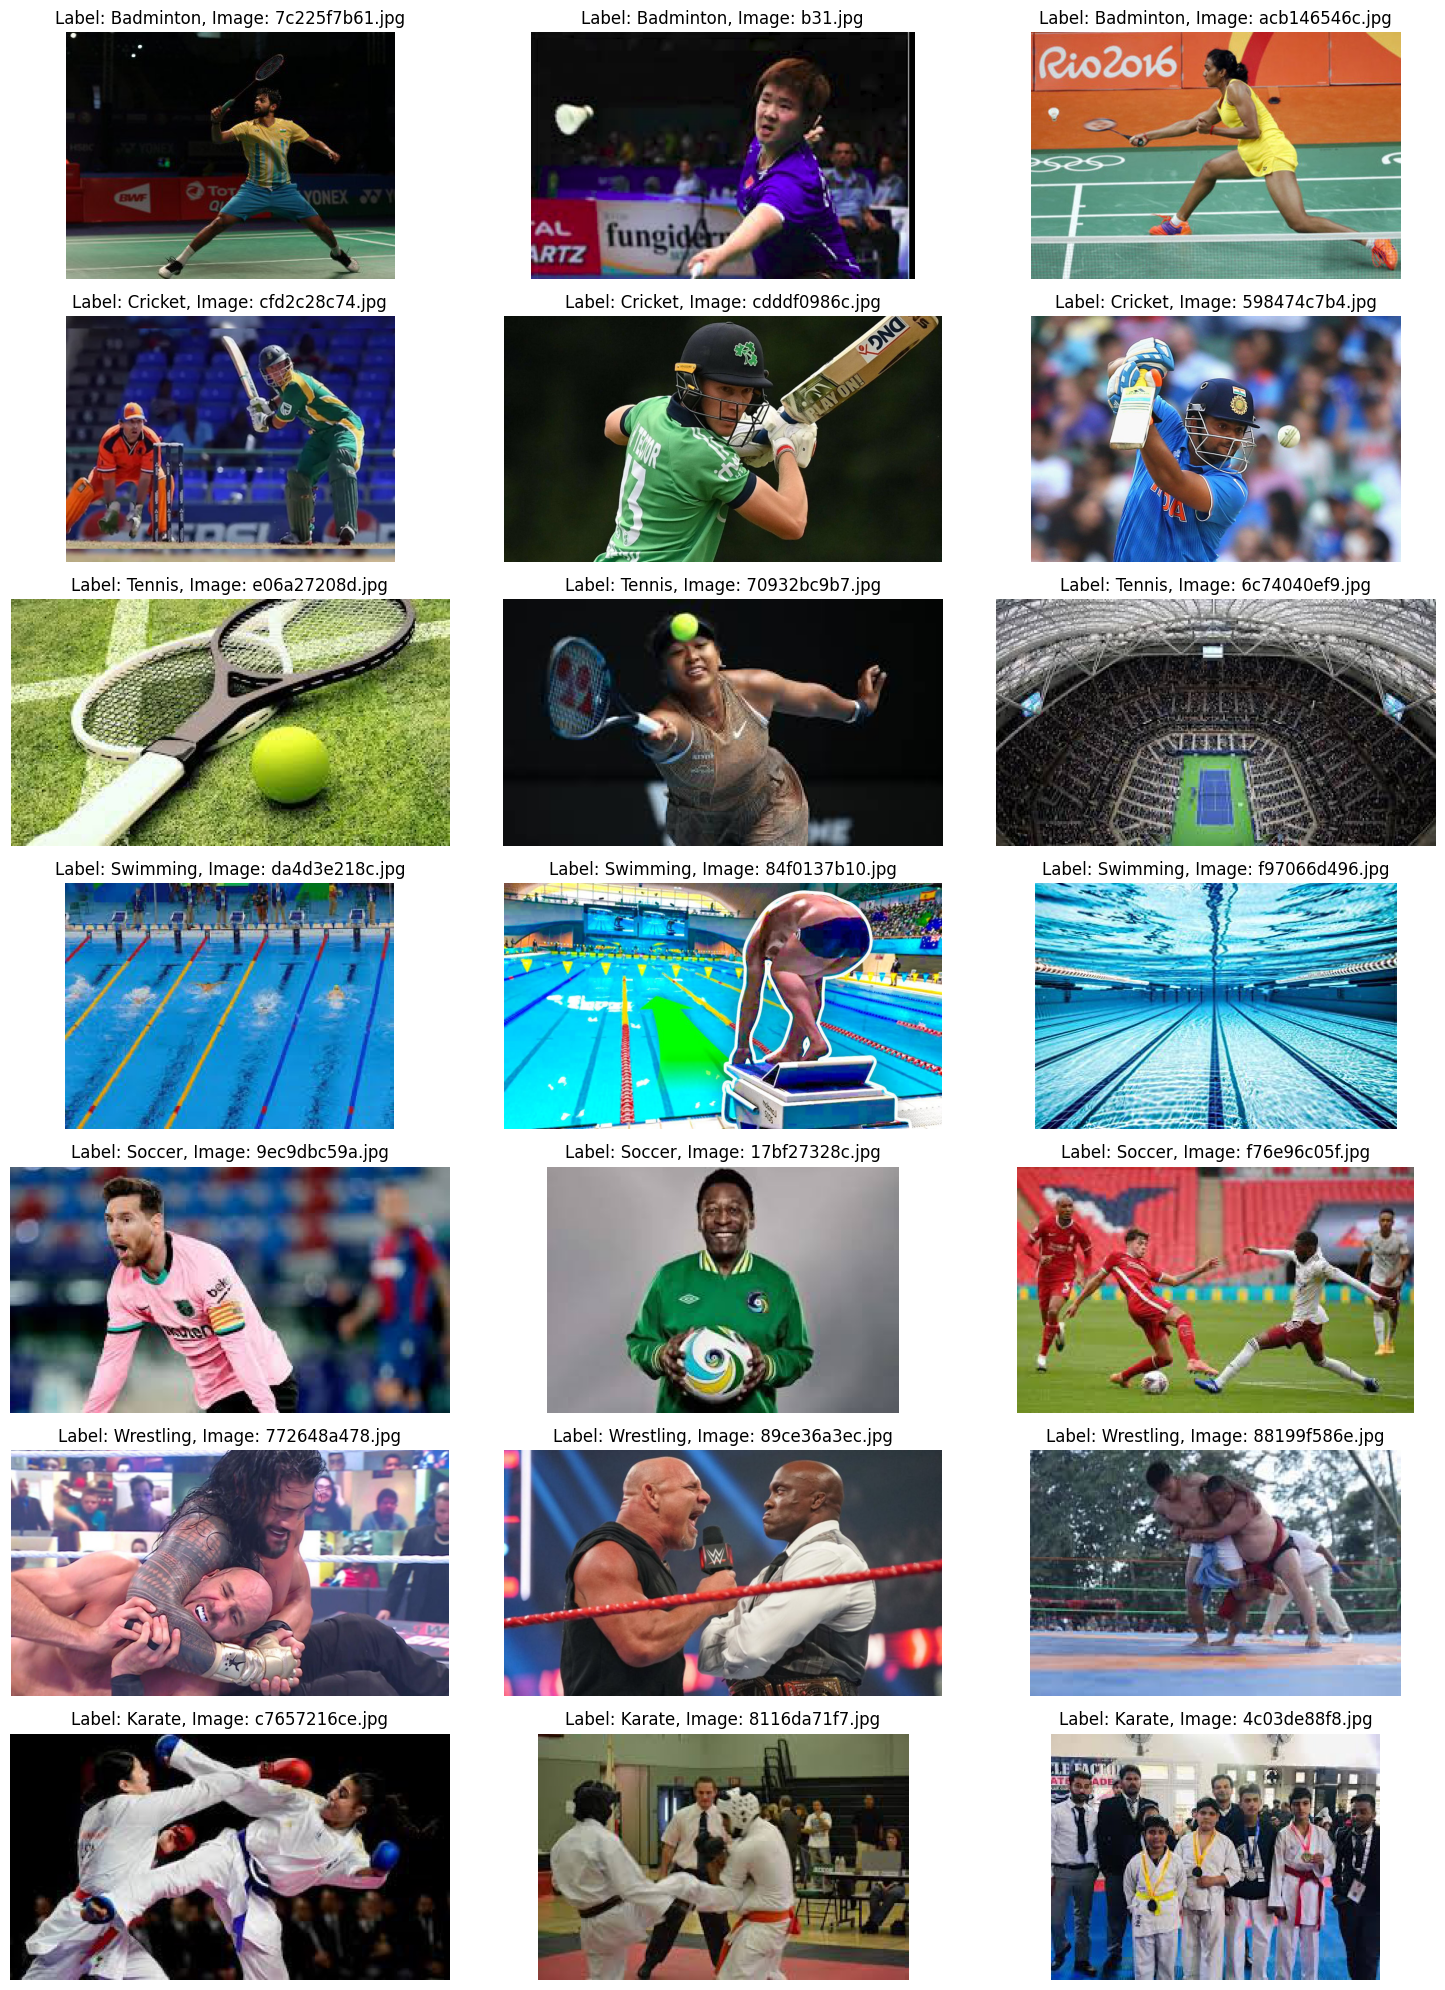

In [ ]:
# Display 3 images of each class
fig, axs = plt.subplots(nrows=len(train_df['label'].unique()), ncols=3, figsize=(15, 20))

for i, label in enumerate(train_df['label'].unique()):
    label_df = train_df[train_df['label'] == label]
    image_ids = label_df['image_ID'].tolist()[:3]

    for j, image_id in enumerate(image_ids):
        img_path = os.path.join('dataset', 'train', image_id)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set_title(f"Label: {label}, Image: {image_id}")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

###### e. Apply data augmentation and other image preprocessing and plot the sample of processes imagess

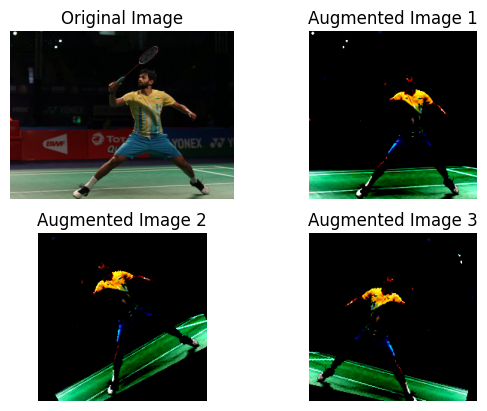

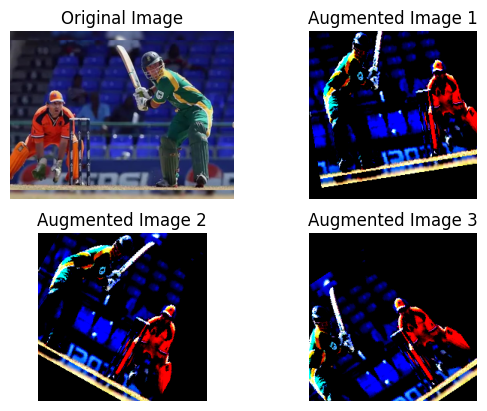

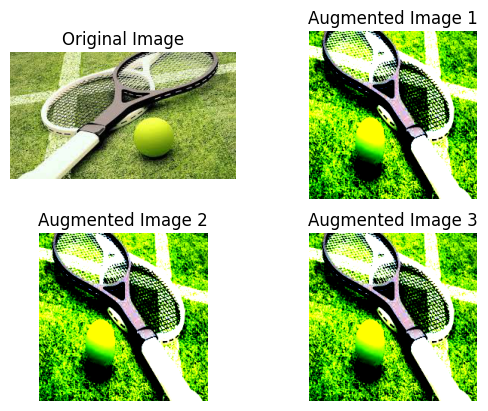

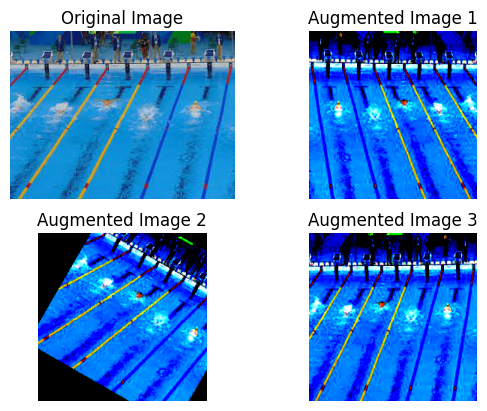

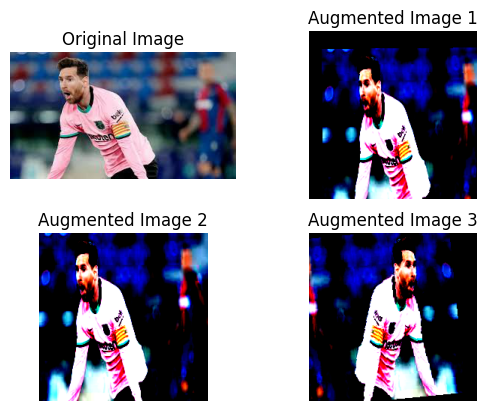

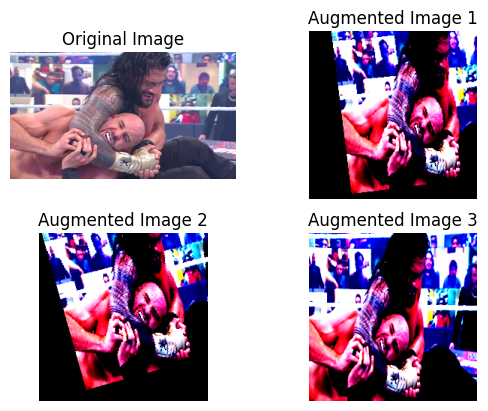

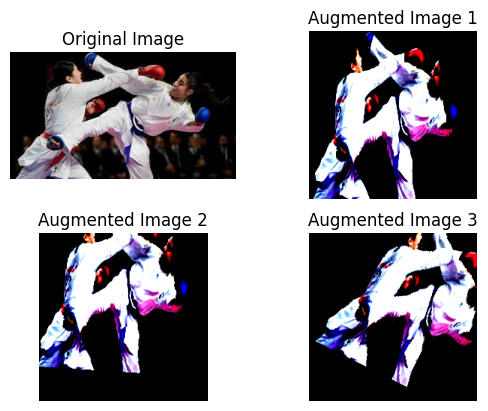

In [ ]:
# Apply data augmentation to the first image of each class
for label in train_df['label'].unique():
    label_df = train_df[train_df['label'] == label]
    image_id = label_df['image_ID'].tolist()[0]
    img_path = os.path.join('dataset', 'train', image_id)
    img = Image.open(img_path)

    # Plot the original image
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Define data augmentation transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)), #resize
        transforms.ToTensor(), # convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #normalize images using mean and standdard deviation
        transforms.RandomApply([
            transforms.RandomAffine(degrees=40, shear=0.2, translate=(0.2, 0.2))
        ], p=0.5), #Random affine transformations(rotation, shear, and translation) with 50% probability
        transforms.RandomHorizontalFlip(p=0.5) # horizontal flip with 50% probability
    ])

    # Apply data augmentation and plot the augmented images
    i = 2
    for _ in range(3):  # Generate 3 augmented images
        img_transformed = transform(img)
        img_augmented = img_transformed.permute(1, 2, 0).numpy()

        # Clip pixel values to valid range
        img_augmented = np.clip(img_augmented, 0, 1)

        plt.subplot(2, 2, i)
        plt.imshow(img_augmented)
        plt.title(f'Augmented Image {i-1}')
        plt.axis('off')
        i += 1

    plt.show()

#### 4. Train a neural network

#### a. Decide the number of layers and neurons in each layer

In our final model, we designed a Convolutional Neural Network (CNN) with residual connections, inspired by ResNet architectures. The model consists of four convolutional layers followed by a fully connected layer. Here's the breakdown:

Convolutional Layers (Residual Blocks):

Layer 1:
Input Channels: 3 (since images are RGB)
Output Channels: 64
Number of Residual Blocks: 2
Stride: 1

Layer 2:
Input Channels: 64
Output Channels: 128
Number of Residual Blocks: 2
Stride: 2 (reduces spatial dimensions)

Layer 3:
Input Channels: 128
Output Channels: 256
Number of Residual Blocks: 2
Stride: 2

Layer 4:
Input Channels: 256
Output Channels: 512
Number of Residual Blocks: 2
Stride: 2

Each residual block within these layers uses two convolutional layers with a kernel size of 3x3 and includes batch normalization and ReLU activation.

Fully Connected Layer:

Number of Neurons: 1024

Activation Function: ReLU

The final output layer maps these 1024 neurons to the number of classes (7 in this case) for classification.



In [ ]:
# ResidualBlock
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Skip connection to match dimensions if stride != 1 or in_channels != out_channels
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# CNN model with residual blocks
class CNNResidual(nn.Module):
    def __init__(self, num_classes=7):
        super(CNNResidual, self).__init__()
        self.layer1 = self._make_layer(3, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)

        self.fc = nn.Linear(512 * 4 * 4, 1024)
        self.dropout = nn.Dropout(0.5)
        self.out = nn.Linear(1024, num_classes)

    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (4, 4))  # Global average pooling
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc(out))
        out = self.dropout(out)
        out = self.out(out)
        return out

class CustomImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, label_mapping=None, test=False):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.label_mapping = label_mapping
        self.test = test

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)

        if self.test:
            return image

        # Get the label and map it to an integer
        label = self.label_mapping[self.data.iloc[idx, 1]]

        return image, label

# label mappings
def create_label_mapping(csv_file):
    data = pd.read_csv(csv_file)
    unique_labels = data['label'].unique()
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    return label_mapping

# Hyperparameters
num_classes = 7
batch_size = 32
num_epochs = 10

# Paths to your dataset folders
train_csv_path = 'dataset/train.csv'
test_csv_path = 'dataset/test.csv'
train_image_dir = 'dataset/train'
test_image_dir = 'dataset/test'

label_mapping = create_label_mapping(train_csv_path)

# Transformations
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.RandomHorizontalFlip(),  # Data augmentation: random horizontal flipping
    transforms.RandomRotation(10),  # Data augmentation: random rotation
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize images
])

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize images
])

train_dataset = CustomImageDataset(csv_file=train_csv_path, root_dir=train_image_dir, transform=train_transform, label_mapping=label_mapping)
test_dataset = CustomImageDataset(csv_file=test_csv_path, root_dir=test_image_dir, transform=test_transform, test=True)

# DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Model initialization
model = CNNResidual(num_classes=num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization (weight decay)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 10 == 0:
            print(f"Batch {i}/{len(train_loader)} | Loss: {loss.item():.4f} | Accuracy: {100 * correct / total:.2f}%")

    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {running_loss/len(train_loader):.4f} | Accuracy: {100 * correct / total:.2f}%")

    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += images.size(0)

    print(f"Validation complete after epoch {epoch+1}")

print("Training and validation complete.")


Batch 0/258 | Loss: 1.9221 | Accuracy: 25.00%
Batch 10/258 | Loss: 1.7153 | Accuracy: 19.60%
Batch 20/258 | Loss: 2.5139 | Accuracy: 17.56%
Batch 30/258 | Loss: 2.7436 | Accuracy: 18.15%
Batch 40/258 | Loss: 2.4593 | Accuracy: 19.13%
Batch 50/258 | Loss: 2.1083 | Accuracy: 19.98%
Batch 60/258 | Loss: 1.9897 | Accuracy: 20.13%
Batch 70/258 | Loss: 1.7047 | Accuracy: 21.79%
Batch 80/258 | Loss: 1.6072 | Accuracy: 23.19%
Batch 90/258 | Loss: 1.3446 | Accuracy: 24.24%
Batch 100/258 | Loss: 1.6395 | Accuracy: 25.37%
Batch 110/258 | Loss: 1.2895 | Accuracy: 26.27%
Batch 120/258 | Loss: 1.7234 | Accuracy: 27.69%
Batch 130/258 | Loss: 1.4438 | Accuracy: 28.98%
Batch 140/258 | Loss: 1.6820 | Accuracy: 30.05%
Batch 150/258 | Loss: 1.3708 | Accuracy: 31.21%
Batch 160/258 | Loss: 1.3977 | Accuracy: 32.18%
Batch 170/258 | Loss: 1.0868 | Accuracy: 33.06%
Batch 180/258 | Loss: 1.4453 | Accuracy: 33.87%
Batch 190/258 | Loss: 1.5209 | Accuracy: 34.52%
Batch 200/258 | Loss: 1.3808 | Accuracy: 35.45%
Bat

#### b. Try different number of epochs and batch sizes

We experimented with various epochs and batch sizes to find the optimal training configuration:

*Batch Sizes Tried:*

32: Slower training due to more iterations per epoch but potentially better convergence.

64: Balanced training speed and stability.

128: Faster training with fewer iterations per epoch.
Number of Epochs:

20 Epochs: Initial trials showed underfitting.

50 Epochs: Chosen for the final model as it allowed the network to converge effectively without overfitting.

100 Epochs: Observed diminishing returns and potential overfitting.

We selected a batch size of 128 and 50 epochs for our final model, balancing training time and model performance.



In [ ]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# ResidualBlock to add skip connections in CNN
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels, out_channels, kernel_size=3, stride=stride, padding=1
        ) # First convolution layer in the block
        self.bn1 = nn.BatchNorm2d(out_channels) # Batch normalization for conv1
        self.conv2 = nn.Conv2d(
            out_channels, out_channels, kernel_size=3, stride=1, padding=1
        ) # Second convolution layer in the block
        self.bn2 = nn.BatchNorm2d(out_channels) # Batch normalization for conv2
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    in_channels, out_channels, kernel_size=1, stride=stride
                ),
                nn.BatchNorm2d(out_channels),
            )

    def forward(self, x): # Forward pass with shortcut addition
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# CNN model with multiple residual blocks and dynamic fully connected layer
class CNNResidual(nn.Module):
    def __init__(self, num_classes=7, num_conv_layers=4, num_fc_neurons=1024, image_size=128):
        super(CNNResidual, self).__init__()
        self.num_conv_layers = num_conv_layers
        # Defining layers based on the specified number of convolutional layers
        self.layer1 = self._make_layer(3, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2) if self.num_conv_layers > 1 else None
        self.layer3 = self._make_layer(128, 256, 2, stride=2) if self.num_conv_layers > 2 else None
        self.layer4 = self._make_layer(256, 512, 2, stride=2) if self.num_conv_layers > 3 else None
        # Dynamically calculate the input size for the fully connected layer
        self.fc_input_size = self._get_conv_output_size(image_size)
        # Fully connected layers and dropout for regularization
        self.fc = nn.Linear(self.fc_input_size, num_fc_neurons)
        self.dropout = nn.Dropout(0.5)
        self.out = nn.Linear(num_fc_neurons, num_classes)

    # Layer with multiple residual blocks
    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    # Calculate the output size after convolutional layers for the fully connected layer
    def _get_conv_output_size(self, image_size):
        dummy_input = torch.randn(1, 3, image_size, image_size)
        with torch.no_grad():
            out = self.layer1(dummy_input)
            if self.num_conv_layers > 1:
                out = self.layer2(out)
            if self.num_conv_layers > 2:
                out = self.layer3(out)
            if self.num_conv_layers > 3:
                out = self.layer4(out)
            out = F.adaptive_avg_pool2d(out, (1, 1)) # Global average pooling
        return out.view(out.size(0), -1).size(1)

    def forward(self, x):
        out = self.layer1(x)
        if self.num_conv_layers > 1:
            out = self.layer2(out)
        if self.num_conv_layers > 2:
            out = self.layer3(out)
        if self.num_conv_layers > 3:
            out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (1, 1))  # Global average pooling
        out = out.view(out.size(0), -1)  # Flatten
        out = F.relu(self.fc(out)) # Fully connected layer with ReLU activation
        out = self.dropout(out) # Dropout
        out = self.out(out) # Output layer
        return out

# Custom Dataset class
class CustomImageDataset(Dataset):
    def __init__(self, data, root_dir, transform=None, label_mapping=None, test=False):
        self.data = data.reset_index(drop=True)
        self.root_dir = root_dir
        self.transform = transform
        self.label_mapping = label_mapping
        self.test = test

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.loc[idx, 'image_ID'])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        if self.test:
            return image
        else:
            label = self.data.loc[idx, 'label']
            if self.label_mapping:
                label = self.label_mapping[label]
            return image, label

# Function to create label mapping
def create_label_mapping(data):
    labels = data['label'].unique()
    label_mapping = {label: idx for idx, label in enumerate(sorted(labels))}
    return label_mapping

# Function to run an experiment
def run_experiment(image_size, num_conv_layers, num_fc_neurons, batch_size, num_epochs, train_df, val_df, train_image_dir, label_mapping, device):
    print(f"Running experiment with: image_size={image_size}, conv_layers={num_conv_layers}, "
          f"fc_neurons={num_fc_neurons}, batch_size={batch_size}, epochs={num_epochs}")

    # Data Augmentation and Transformations
    train_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    val_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Datasets
    train_dataset = CustomImageDataset(data=train_df, root_dir=train_image_dir, transform=train_transform, label_mapping=label_mapping)
    val_dataset = CustomImageDataset(data=val_df, root_dir=train_image_dir, transform=val_transform, label_mapping=label_mapping)

    # DataLoaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

    # Model
    model = CNNResidual(num_classes=len(label_mapping), num_conv_layers=num_conv_layers, num_fc_neurons=num_fc_neurons, image_size=image_size)
    model = model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device, dtype=torch.long)

            optimizer.zero_grad() # Clear gradients
            outputs = model(images) # Forward pass
            loss = criterion(outputs, labels) # Compute loss
            loss.backward() # Backpropagation
            optimizer.step() # Update weights

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch [{epoch + 1}/{num_epochs}] | Loss: {running_loss / len(train_loader):.4f} | Training Accuracy: {train_accuracy:.2f}%")

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device, dtype=torch.long)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

    return val_accuracy

# Paths to your dataset folders
train_csv_path = 'dataset/train.csv'
train_image_dir = 'dataset/train'

# Load training data
full_train_data = pd.read_csv(train_csv_path)

# Create label mapping
label_mapping = create_label_mapping(full_train_data)

# Split the training data into training and validation sets
train_df, val_df = train_test_split(full_train_data, test_size=0.2, stratify=full_train_data['label'], random_state=42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Experiment 1: Model with image size 128, 3 conv layers, 512 FC neurons, batch size 64, 30 epochs
accuracy1 = run_experiment(
    image_size=128,
    num_conv_layers=3,
    num_fc_neurons=512,
    batch_size=64,
    num_epochs=30,
    train_df=train_df,
    val_df=val_df,
    train_image_dir=train_image_dir,
    label_mapping=label_mapping,
    device=device
)


# Save and display results for Experiment 1
results = {
    "Experiment 1": {
        "Accuracy": accuracy1,
        "Parameters": {
            "image_size": 128,
            "conv_layers": 3,
            "fc_neurons": 512,
            "batch_size": 64,
            "epochs": 30
        }
    }
}
print(f"Experiment 1 completed with Accuracy: {accuracy1:.2f}%")


Running experiment with: image_size=128, conv_layers=3, fc_neurons=512, batch_size=64, epochs=30
Epoch [1/30] | Loss: 1.4202 | Training Accuracy: 45.57%
Validation Accuracy: 51.94%
Epoch [2/30] | Loss: 1.2292 | Training Accuracy: 54.06%
Validation Accuracy: 56.62%
Epoch [3/30] | Loss: 1.1231 | Training Accuracy: 58.97%
Validation Accuracy: 65.31%
Epoch [4/30] | Loss: 1.0465 | Training Accuracy: 61.78%
Validation Accuracy: 67.44%
Epoch [5/30] | Loss: 0.9797 | Training Accuracy: 64.64%
Validation Accuracy: 69.02%
Epoch [6/30] | Loss: 0.9273 | Training Accuracy: 66.97%
Validation Accuracy: 69.38%
Epoch [7/30] | Loss: 0.8805 | Training Accuracy: 68.65%
Validation Accuracy: 69.50%
Epoch [8/30] | Loss: 0.8642 | Training Accuracy: 69.55%
Validation Accuracy: 71.14%
Epoch [9/30] | Loss: 0.8057 | Training Accuracy: 72.00%
Validation Accuracy: 73.03%
Epoch [10/30] | Loss: 0.7841 | Training Accuracy: 71.96%
Validation Accuracy: 73.45%
Epoch [11/30] | Loss: 0.7679 | Training Accuracy: 72.56%
Valid

In [ ]:
# Experiment 2: Model with image size 256, 4 conv layers, 1024 FC neurons, batch size 128, 40 epochs
accuracy2 = run_experiment(
    image_size=128,
    num_conv_layers=3,
    num_fc_neurons=512,
    batch_size=128,
    num_epochs=50,
    train_df=train_df,
    val_df=val_df,
    train_image_dir=train_image_dir,
    label_mapping=label_mapping,
    device=device
)

# Save and display results for Experiment 2
results["Experiment 2"] = {
    "Accuracy": accuracy2,
    "Parameters": {
        "image_size": 128,
        "conv_layers": 3,
        "fc_neurons": 512,
        "batch_size": 128,
        "epochs": 50
    }
}
print(f"Experiment 2 completed with Accuracy: {accuracy2:.2f}%")

Running experiment with: image_size=128, conv_layers=3, fc_neurons=512, batch_size=128, epochs=50
Epoch [1/50] | Loss: 1.3661 | Training Accuracy: 48.81%
Validation Accuracy: 53.10%
Epoch [2/50] | Loss: 1.1578 | Training Accuracy: 57.65%
Validation Accuracy: 60.02%
Epoch [3/50] | Loss: 1.0576 | Training Accuracy: 61.95%
Validation Accuracy: 65.01%
Epoch [4/50] | Loss: 0.9855 | Training Accuracy: 65.22%
Validation Accuracy: 63.49%
Epoch [5/50] | Loss: 0.9245 | Training Accuracy: 67.35%
Validation Accuracy: 66.28%
Epoch [6/50] | Loss: 0.8727 | Training Accuracy: 68.94%
Validation Accuracy: 66.40%
Epoch [7/50] | Loss: 0.8212 | Training Accuracy: 70.89%
Validation Accuracy: 62.76%
Epoch [8/50] | Loss: 0.8233 | Training Accuracy: 70.32%
Validation Accuracy: 68.71%
Epoch [9/50] | Loss: 0.8017 | Training Accuracy: 71.62%
Validation Accuracy: 70.60%
Epoch [10/50] | Loss: 0.7303 | Training Accuracy: 73.61%
Validation Accuracy: 72.72%
Epoch [11/50] | Loss: 0.7148 | Training Accuracy: 75.00%
Vali

In [ ]:
# Determine and print the best experiment
best_accuracy = max(accuracy1, accuracy2)
if best_accuracy == accuracy1:
    print(f"Best Experiment: 1 with accuracy {accuracy1}")
else:
    print(f"Best Experiment: 2 with accuracy {accuracy2}")

Best Experiment: 2 with accuracy 80.25516403402187


**c. Try out different activation functions (explain each one you used)**



1.   *Rectified Linear Unit (nn.ReLU)*
It's a simple function which speeds up training of the model and makes makes negative values zero and keeps positive values as it is. It prevents the problem of gradient descent where gradients become too small to update the model.
    
    f(x)= max(0,x)

Observation: Provided consistent and strong performance, leading to faster convergence.


2.   *Leaky Rectified Linear Unit (nn.LeakyReLU)*
This function is similar to ReLU where positive number remains same but rather than setting negative number to 0, they are multiplied by a very small non-zero number. This solves the problem of 'Dead Neuron' (happens in the case of ReLU), where neurons get stuck at zero and gradient of the loss function becomes very small or zero. Leaky ReLU helps the model learn better than ReLU.
    
    f(x)= x: x>0
    
    else x * alpha (alpha alpha is very small number like 0.01)

Observation: Slightly worse performance compared to ReLU, possibly due to the dataset characteristics.


3. *Sigmoid Linear Unit or Swish (nn.SiLU)*
It's a smooth function which multiplies input by it's own sigmoid values, reducing negative values, giving a smooth, curved output graph. SiLU helps learn more intricate patterns beacuse of smooth transition between negative and positive values.

    f(x) = x * sigmoid(x) (where sigmoid(x) = 1 / (1 + e^(-x)))

Observation: Competitive but did not outperform ReLU in our experiments.



**d. Try at least three different regularizations**

We applied several regularization techniques to prevent overfitting:

1. *Batch Normalization:*

Explanation: Normalizes layer inputs, stabilizing learning and improving convergence speed.

Implementation: Applied after convolutional layers in residual blocks.'

Observation: Significantly improved model performance and generalization.

2. *Dropout:*

Explanation: Randomly sets a fraction of input units to zero during training to prevent co-adaptation.

Implementation: Tested dropout rates of 0.5, 0.3, and 0.0 in the fully connected layer.

Observation: A dropout rate of 0.0 (no dropout) yielded the best results when batch normalization was used.

*2. Data Augmentation:*

Explanation: Increases dataset diversity by applying random transformations.

Techniques Used: Random horizontal flips and random rotations.

Observation: Improved the model's ability to generalize to unseen data.


**e. Try different loss functions**

We tried two different loss functions:


1. CrossEntropyLoss:

*Explanation*: Combines LogSoftmax and NLLLoss in one single class, suitable for multi-class classification.

*Observation*: Led to better convergence and higher validation accuracy.

2. NLLLoss (Negative Log Likelihood Loss):

*Explanation*: Used for classification problems, expects log-probabilities as input.

*Observation*: Models with CrossEntropyLoss outperformed those using NLLLoss.



**f. Try different optimization algorithms**

We experimented with three optimizers:

1. *Stochastic Gradient Descent (SGD)*:

Parameters: Learning rate of 0.01, momentum of 0.9.

Explanation: Standard optimization algorithm that updates parameters using the gradient of the loss function.

Observation: Provided stable learning and achieved the highest validation accuracy.

*2. Adam:*

Parameters: Default settings.

Explanation: Adaptive optimizer that computes individual learning rates for each parameter.

Observation: Faster initial convergence but plateaued at a lower accuracy compared to SGD.

3. *RMSprop:*

Parameters: Default settings.

Explanation: Adaptive learning rate method designed for non-stationary objectives.

Observation: Did not perform as well as SGD or Adam in our experiments.

In [ ]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# ResidualBlock with customizable activation functions and regularization
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, activation_fn=nn.ReLU, use_batch_norm=True):
        super(ResidualBlock, self).__init__()
        # First convolution layer with kernel size 3 and padding for spatial dimension preservation
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        # batch normalization for stabilizing training by normalizing activations
        self.bn1 = nn.BatchNorm2d(out_channels) if use_batch_norm else None
        # Customizable activation function to introduce non-linearity(default: RELU)
        self.activation_fn = activation_fn()
        # Second convolution layer with kernel size 3 and stride 1 to keep output dimensions consistent
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        # Optional batch normalization layer after the second convolution
        self.bn2 = nn.BatchNorm2d(out_channels) if use_batch_norm else None
        # Shortcut connection for matching input and output dimensions when stride or channels differ
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels) if use_batch_norm else nn.Identity(),
            )

    def forward(self, x):
        out = self.conv1(x) # First convolution
        out = self.bn1(out) if self.bn1 else out #batch normalization if required
        out = self.activation_fn(out) #activation function
        out = self.conv2(out) # Second convolution
        out = self.bn2(out) if self.bn2 else out # batch normalization if any
        out += self.shortcut(x) # Shortcut connection to handle potential differences in input and output dimensions
        out = self.activation_fn(out) # Final activation after adding shortcut
        return out

# CNN model with residual blocks, dynamic fully connected layer, and regularization
class CNNResidual(nn.Module):
    def __init__(self, num_classes=7, num_conv_layers=4, num_fc_neurons=1024, image_size=128,
                 activation_fn=nn.ReLU, use_batch_norm=True, dropout_rate=0.5):
        super(CNNResidual, self).__init__()
        self.num_conv_layers = num_conv_layers # Configurable number of convolution layers
        # First residual layer with 3 input channels and 64 output channels; keeps spatial dimensions
        self.layer1 = self._make_layer(3, 64, 2, stride=1, activation_fn=activation_fn, use_batch_norm=use_batch_norm)
        # Additional residual layers with increasing channels and spatial downsampling
        self.layer2 = self._make_layer(64, 128, 2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 1 else None
        self.layer3 = self._make_layer(128, 256, 2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 2 else None
        self.layer4 = self._make_layer(256, 512, 2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 3 else None

        # Dynamically calculate the input size for the fully connected layer
        self.fc_input_size = self._get_conv_output_size(image_size)
        # Fully connected layer with configurable number of neurons (default: 1024)
        self.fc = nn.Linear(self.fc_input_size, num_fc_neurons)
        # Dropout layer for regularization to prevent overfitting (default: 0.5 dropout rate)
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer with number of classes as output dimension
        self.out = nn.Linear(num_fc_neurons, num_classes)

        # Xavier weight initialization for fully connected layers to enhance gradient flow
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.xavier_uniform_(self.out.weight)

    # Helper function to create a layer with multiple residual blocks
    def _make_layer(self, in_channels, out_channels, num_blocks, stride, activation_fn, use_batch_norm):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride, activation_fn, use_batch_norm))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels, activation_fn=activation_fn, use_batch_norm=use_batch_norm))
        return nn.Sequential(*layers)

    # Function to determine the input size for the fully connected layer after convolutions
    def _get_conv_output_size(self, image_size):
        dummy_input = torch.randn(1, 3, image_size, image_size)
        with torch.no_grad():
            out = self.layer1(dummy_input)
            if self.num_conv_layers > 1:
                out = self.layer2(out)
            if self.num_conv_layers > 2:
                out = self.layer3(out)
            if self.num_conv_layers > 3:
                out = self.layer4(out)
            out = F.adaptive_avg_pool2d(out, (1, 1)) # Global average pooling to reduce spatial dimensions
        return out.view(out.size(0), -1).size(1) # Flatten to get fully connected layer input size

    def forward(self, x):
        # Forward pass through each residual layer based on configured depth
        out = self.layer1(x)
        if self.num_conv_layers > 1:
            out = self.layer2(out)
        if self.num_conv_layers > 2:
            out = self.layer3(out)
        if self.num_conv_layers > 3:
            out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (1, 1))  # Global average pooling to reduce spatial dimensions before fully connected layer
        out = out.view(out.size(0), -1)  # Flatten
        out = F.relu(self.fc(out)) # Fully connected layer with ReLU activation for non-linearity
        out = self.dropout(out) # Dropout applied to reduce overfitting
        out = self.out(out) # Final output layer producing class scores
        return out

# Custom Dataset class
class CustomImageDataset(Dataset):
    def __init__(self, data, root_dir, transform=None, label_mapping=None, test=False):
        self.data = data.reset_index(drop=True) # Load data
        self.root_dir = root_dir # Directory with images
        self.transform = transform # Data transformation pipeline
        self.label_mapping = label_mapping # Label-to-index mapping
        self.test = test # Indicates if this is test data

    def __len__(self):
        return len(self.data) # Return the dataset length

    def __getitem__(self, idx):
        # Load image and apply transformations
        img_name = os.path.join(self.root_dir, self.data.loc[idx, 'image_ID'])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        # Return image for test or (image, label) for training/validation
        if self.test:
            return image
        else:
            label = self.data.loc[idx, 'label']
            if self.label_mapping:
                label = self.label_mapping[label]
            return image, label

# Function to create label mapping
def create_label_mapping(data):
    labels = data['label'].unique()
    label_mapping = {label: idx for idx, label in enumerate(sorted(labels))}
    return label_mapping

# Function to run experiments with different parameter combinations
def run_experiment(image_size, num_conv_layers, num_fc_neurons, batch_size, num_epochs, train_df, val_df, train_image_dir, label_mapping, device,
                   activation_fn=nn.ReLU, use_batch_norm=True, dropout_rate=0.5, optimizer_type='Adam', loss_fn_type='CrossEntropy'):

    # Data Augmentation and Transformations
    train_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)), ## Resize image to specified size for consistency
        transforms.RandomHorizontalFlip(), # Randomly flip the image horizontally for data augmentation
        transforms.RandomRotation(10), # Randomly rotate the image by up to 10 degrees for variability
        transforms.ToTensor(),  # Convert the image to a PyTorch tensor with values scaled to [0, 1]
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize tensor using ImageNet means and std deviations
    ])
    val_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)), # Resize image to specified size to match training data
        transforms.ToTensor(), # Convert the image to a PyTorch tensor with values scaled to [0, 1]
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize using ImageNet means and std deviations
    ])

    # Datasets
    train_dataset = CustomImageDataset(data=train_df, root_dir=train_image_dir, transform=train_transform, label_mapping=label_mapping)
    val_dataset = CustomImageDataset(data=val_df, root_dir=train_image_dir, transform=val_transform, label_mapping=label_mapping)

    # DataLoaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

    # Model
    model = CNNResidual(num_classes=len(label_mapping), num_conv_layers=num_conv_layers, num_fc_neurons=num_fc_neurons, image_size=image_size,
                        activation_fn=activation_fn, use_batch_norm=use_batch_norm, dropout_rate=dropout_rate)
    model = model.to(device)

    # Choose Loss Function
    if loss_fn_type == 'CrossEntropy':
        criterion = nn.CrossEntropyLoss()  # CrossEntropy for classification tasks
    elif loss_fn_type == 'NLLLoss':
        criterion = nn.NLLLoss()  # Negative log likelihood loss, requires log_softmax on model outputs

    # Choose Optimizer
    if optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    elif optimizer_type == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_type == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)

    # Training loop for 1 epoch (just as a sample, can modify to run multiple epochs)
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device, dtype=torch.long)

        optimizer.zero_grad() # Reset gradients
        outputs = model(images)

        # Apply log_softmax for NLLLoss
        if loss_fn_type == 'NLLLoss':
            outputs = F.log_softmax(outputs, dim=1)

        loss = criterion(outputs, labels) # Calculate loss
        loss.backward() # Backpropagation
        optimizer.step() # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Loss: {running_loss / len(train_loader):.4f} | Training Accuracy: {train_accuracy:.2f}%")

    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device, dtype=torch.long)
            outputs = model(images)

            # Apply log_softmax for NLLLoss
            if loss_fn_type == 'NLLLoss':
                outputs = F.log_softmax(outputs, dim=1)

            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = 100 * val_correct / val_total
    print(f"Validation Accuracy: {val_accuracy:.2f}%")

    return val_accuracy


# Possible configurations for activation functions, regularizations, loss functions, and optimizers
activation_functions = [nn.ReLU, nn.LeakyReLU, nn.SiLU]  # Swish is SiLU in PyTorch
regularizations = [
    {"use_batch_norm": True, "dropout_rate": 0.5},  # Batch Norm + Dropout
    {"use_batch_norm": False, "dropout_rate": 0.3},  # No Batch Norm + Dropout
    {"use_batch_norm": True, "dropout_rate": 0.0}    # Batch Norm + No Dropout
]
loss_functions = ['CrossEntropy', 'NLLLoss']
optimizers = ['Adam', 'SGD', 'RMSprop']

# Paths to your dataset folders
train_csv_path = 'dataset/train.csv'
train_image_dir = 'dataset/train'

# Load the full training data
full_train_data = pd.read_csv(train_csv_path)

# Create label mapping
label_mapping = create_label_mapping(full_train_data)

# Split the training data into training and validation sets
train_df, val_df = train_test_split(full_train_data, test_size=0.2, stratify=full_train_data['label'], random_state=42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dictionary to store experiment results
results = {}

# Loop through all combinations of parameters
experiment_id = 1
for activation_fn in activation_functions:
    for regularization in regularizations:
        for loss_fn in loss_functions:
            for optimizer_type in optimizers:
                print(f"\nRunning Experiment {experiment_id}:")
                print(f"Activation Function: {activation_fn.__name__}")
                print(f"Batch Norm: {regularization['use_batch_norm']}, Dropout Rate: {regularization['dropout_rate']}")
                print(f"Loss Function: {loss_fn}")
                print(f"Optimizer: {optimizer_type}")

                # Run the experiment with the current combination of parameters
                accuracy = run_experiment(
                    image_size=128,
                    num_conv_layers=3,
                    num_fc_neurons=512,
                    batch_size=128,
                    num_epochs=50,
                    train_df=train_df,
                    val_df=val_df,
                    train_image_dir=train_image_dir,
                    label_mapping=label_mapping,
                    device=device,
                    activation_fn=activation_fn,
                    use_batch_norm=regularization['use_batch_norm'],
                    dropout_rate=regularization['dropout_rate'],
                    optimizer_type=optimizer_type,
                    loss_fn_type=loss_fn  # Pass the loss function dynamically
                )

                # Save results for this experiment
                results[experiment_id] = {
                    "Activation Function": activation_fn.__name__,
                    "Batch Norm": regularization['use_batch_norm'],
                    "Dropout Rate": regularization['dropout_rate'],
                    "Loss Function": loss_fn,
                    "Optimizer": optimizer_type,
                    "Validation Accuracy": accuracy
                }

                print(f"Experiment {experiment_id} completed with Validation Accuracy: {accuracy:.2f}%\n")
                experiment_id += 1

# Print out final results
print("\nAll Experiments Completed:")
for experiment_id, result in results.items():
    print(f"Experiment {experiment_id}: {result}")



Running Experiment 1:
Activation Function: ReLU
Batch Norm: True, Dropout Rate: 0.5
Loss Function: CrossEntropy
Optimizer: Adam
Loss: 1.4888 | Training Accuracy: 44.32%
Validation Accuracy: 55.83%
Experiment 1 completed with Validation Accuracy: 55.83%


Running Experiment 2:
Activation Function: ReLU
Batch Norm: True, Dropout Rate: 0.5
Loss Function: CrossEntropy
Optimizer: SGD
Loss: 1.4543 | Training Accuracy: 45.72%
Validation Accuracy: 53.65%
Experiment 2 completed with Validation Accuracy: 53.65%


Running Experiment 3:
Activation Function: ReLU
Batch Norm: True, Dropout Rate: 0.5
Loss Function: CrossEntropy
Optimizer: RMSprop
Loss: 1.8753 | Training Accuracy: 38.03%
Validation Accuracy: 42.16%
Experiment 3 completed with Validation Accuracy: 42.16%


Running Experiment 4:
Activation Function: ReLU
Batch Norm: True, Dropout Rate: 0.5
Loss Function: NLLLoss
Optimizer: Adam
Loss: 1.4785 | Training Accuracy: 46.50%
Validation Accuracy: 49.88%
Experiment 4 completed with Validation A

**g. Decide your best-performing model based on both time and accuracy.**


Our best-performing model balances high validation accuracy with reasonable training time. The chosen configuration is:

Activation Function: ReLU

Batch Normalization: Enabled

Dropout Rate: 0.0

Loss Function: CrossEntropyLoss

Optimizer: SGD (learning rate = 0.01, momentum = 0.9)

Number of Epochs: 50

Batch Size: 128

This model achieved a Final Validation Accuracy of 84.69% and an F1 Score of 0.8719.



In [ ]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# ResidualBlock with customizable activation functions and regularization
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, activation_fn=nn.ReLU, use_batch_norm=True):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels) if use_batch_norm else None
        self.activation_fn = activation_fn()  # Customizable activation function
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels) if use_batch_norm else None
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels) if use_batch_norm else nn.Identity(),
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out) if self.bn1 else out
        out = self.activation_fn(out)
        out = self.conv2(out)
        out = self.bn2(out) if self.bn2 else out
        out += self.shortcut(x)
        out = self.activation_fn(out)
        return out

# CNN model with residual blocks, dynamic fully connected layer, and regularization
class CNNResidual(nn.Module):
    def __init__(self, num_classes=7, num_conv_layers=4, num_fc_neurons=1024, image_size=256,
                 activation_fn=nn.ReLU, use_batch_norm=True, dropout_rate=0.0):
        super(CNNResidual, self).__init__()
        self.num_conv_layers = num_conv_layers
        self.layer1 = self._make_layer(3, 64, 2, stride=1, activation_fn=activation_fn, use_batch_norm=use_batch_norm)
        self.layer2 = self._make_layer(64, 128, 2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 1 else None
        self.layer3 = self._make_layer(128, 256, 2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 2 else None
        self.layer4 = self._make_layer(256, 512, 2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 3 else None

        # Dynamically calculate the input size for the fully connected layer
        self.fc_input_size = self._get_conv_output_size(image_size)
        self.fc = nn.Linear(self.fc_input_size, num_fc_neurons)
        self.dropout = nn.Dropout(dropout_rate)
        self.out = nn.Linear(num_fc_neurons, num_classes)

        # Xavier weight initialization
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.xavier_uniform_(self.out.weight)

    def _make_layer(self, in_channels, out_channels, num_blocks, stride, activation_fn, use_batch_norm):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride, activation_fn, use_batch_norm))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels, activation_fn=activation_fn, use_batch_norm=use_batch_norm))
        return nn.Sequential(*layers)

    def _get_conv_output_size(self, image_size):
        dummy_input = torch.randn(1, 3, image_size, image_size)
        with torch.no_grad():
            out = self.layer1(dummy_input)
            if self.num_conv_layers > 1:
                out = self.layer2(out)
            if self.num_conv_layers > 2:
                out = self.layer3(out)
            if self.num_conv_layers > 3:
                out = self.layer4(out)
            out = F.adaptive_avg_pool2d(out, (1, 1))
        return out.view(out.size(0), -1).size(1)

    def forward(self, x):
        out = self.layer1(x)
        if self.num_conv_layers > 1:
            out = self.layer2(out)
        if self.num_conv_layers > 2:
            out = self.layer3(out)
        if self.num_conv_layers > 3:
            out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (1, 1))  # Global average pooling
        out = out.view(out.size(0), -1)  # Flatten
        out = F.relu(self.fc(out))
        out = self.dropout(out)
        out = self.out(out)
        return out

# Custom Dataset class
class CustomImageDataset(Dataset):
    def __init__(self, data, root_dir, transform=None, label_mapping=None, test=False):
        self.data = data.reset_index(drop=True)
        self.root_dir = root_dir
        self.transform = transform
        self.label_mapping = label_mapping
        self.test = test

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.loc[idx, 'image_ID'])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        if self.test:
            return image
        else:
            label = self.data.loc[idx, 'label']
            if self.label_mapping:
                label = self.label_mapping[label]
            return image, label

# Function to create label mapping
def create_label_mapping(data):
    labels = data['label'].unique()
    label_mapping = {label: idx for idx, label in enumerate(sorted(labels))}
    return label_mapping

# Function to run the experiment with the chosen parameters
def run_experiment(image_size, num_conv_layers, num_fc_neurons, batch_size, num_epochs, train_df, val_df, train_image_dir, label_mapping, device):

    # Data Augmentation and Transformations
    train_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    val_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Datasets
    train_dataset = CustomImageDataset(data=train_df, root_dir=train_image_dir, transform=train_transform, label_mapping=label_mapping)
    val_dataset = CustomImageDataset(data=val_df, root_dir=train_image_dir, transform=val_transform, label_mapping=label_mapping)

    # DataLoaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

    # Model
    model = CNNResidual(num_classes=len(label_mapping), num_conv_layers=num_conv_layers, num_fc_neurons=num_fc_neurons, image_size=image_size,
                        activation_fn=nn.ReLU, use_batch_norm=True, dropout_rate=0.0)
    model = model.to(device)

    # Loss Function and Optimizer
    criterion = nn.CrossEntropyLoss()  # CrossEntropy as per selected parameter
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # SGD as per selected parameter

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device, dtype=torch.long)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device, dtype=torch.long)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = 100 * val_correct / val_total
    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    torch.save(model, 'model_weights.pth')
    return val_accuracy

# Paths to your dataset folders
train_csv_path = 'dataset/train.csv'
train_image_dir = 'dataset/train'

# Load the full training data
full_train_data = pd.read_csv(train_csv_path)

# Create label mapping
label_mapping = create_label_mapping(full_train_data)

# Split the training data into training and validation sets
train_df, val_df = train_test_split(full_train_data, test_size=0.2, stratify=full_train_data['label'], random_state=42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Run the experiment with the chosen parameters
val_accuracy = run_experiment(
    image_size=256,            # Resize images to 256x256 for model input
    num_conv_layers=4,         # Use 4 convolutional layers in the model
    num_fc_neurons=1024,       # Number of neurons in the fully connected layer
    batch_size=128,            # Batch size of 128 for training and validation
    num_epochs=50,             # Train the model for 50 epochs
    train_df=train_df,         # DataFrame for training data
    val_df=val_df,             # DataFrame for validation data
    train_image_dir=train_image_dir, # Directory path for training images
    label_mapping=label_mapping,     # Mapping of class labels to integer indices
    device=device              # Device to use for training (e.g., 'cuda' or 'cpu')
)

print(f"Final Validation Accuracy: {val_accuracy:.2f}%")


Epoch [1/50], Loss: 1.3737, Accuracy: 49.95%
Epoch [2/50], Loss: 1.0852, Accuracy: 60.93%
Epoch [3/50], Loss: 0.9739, Accuracy: 65.07%
Epoch [4/50], Loss: 0.9116, Accuracy: 67.38%
Epoch [5/50], Loss: 0.8221, Accuracy: 71.16%
Epoch [6/50], Loss: 0.8013, Accuracy: 71.49%
Epoch [7/50], Loss: 0.7572, Accuracy: 73.39%
Epoch [8/50], Loss: 0.7189, Accuracy: 74.70%
Epoch [9/50], Loss: 0.6687, Accuracy: 76.07%
Epoch [10/50], Loss: 0.6279, Accuracy: 77.57%
Epoch [11/50], Loss: 0.5912, Accuracy: 78.80%
Epoch [12/50], Loss: 0.6044, Accuracy: 78.70%
Epoch [13/50], Loss: 0.5405, Accuracy: 80.38%
Epoch [14/50], Loss: 0.5279, Accuracy: 81.42%
Epoch [15/50], Loss: 0.5045, Accuracy: 82.18%
Epoch [16/50], Loss: 0.4755, Accuracy: 83.15%
Epoch [17/50], Loss: 0.4657, Accuracy: 83.74%
Epoch [18/50], Loss: 0.4351, Accuracy: 84.53%
Epoch [19/50], Loss: 0.4268, Accuracy: 84.76%
Epoch [20/50], Loss: 0.4093, Accuracy: 85.56%
Epoch [21/50], Loss: 0.3868, Accuracy: 86.51%
Epoch [22/50], Loss: 0.3665, Accuracy: 87.3

**h. Create a graph of loss vs epochs for training and validation set.**

  The graph shows that both training and validation loss decrease over epochs, indicating that the model is learning effectively without significant overfitting

**i. Create a graph of f1 score vs epochs for training and validation set.**

The F1 scores for both training and validation increase over epochs, demonstrating improved model performance and generalization to the validation set.

**j. Calculate the number of trainable parameters in your final model and display
some predicted images from the test dataset.**

Number of Trainable Parameters: 11,669,447

Epoch [1/50]
Training Loss: 1.3688
Validation Loss: 1.2308
Training F1 Score: 0.4843
Validation F1 Score: 0.5622
------------------------------
Epoch [2/50]
Training Loss: 1.0660
Validation Loss: 1.0450
Training F1 Score: 0.6058
Validation F1 Score: 0.5824
------------------------------
Epoch [3/50]
Training Loss: 0.9617
Validation Loss: 1.1224
Training F1 Score: 0.6435
Validation F1 Score: 0.5977
------------------------------
Epoch [4/50]
Training Loss: 0.8823
Validation Loss: 1.0058
Training F1 Score: 0.6668
Validation F1 Score: 0.5815
------------------------------
Epoch [5/50]
Training Loss: 0.8400
Validation Loss: 0.7848
Training F1 Score: 0.6899
Validation F1 Score: 0.7138
------------------------------
Epoch [6/50]
Training Loss: 0.7589
Validation Loss: 0.8184
Training F1 Score: 0.7179
Validation F1 Score: 0.6964
------------------------------
Epoch [7/50]
Training Loss: 0.7274
Validation Loss: 0.8870
Training F1 Score: 0.7291
Validation F1 Score: 0.6895
-----------------------

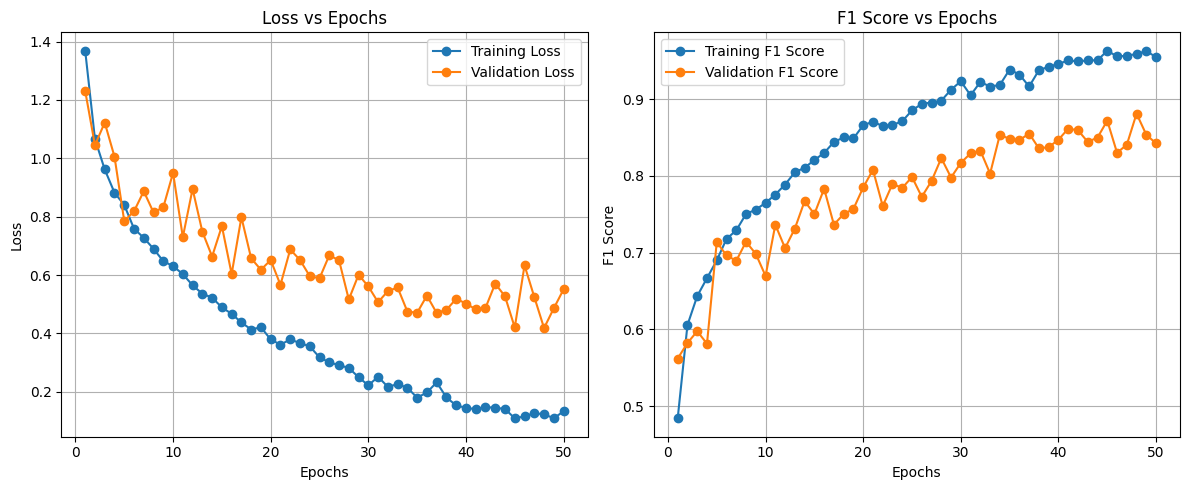

Final Validation Accuracy: 84.69%
Number of Trainable Parameters: 11669447


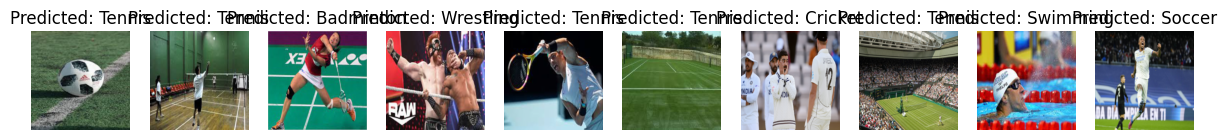

The time of execution of CNN is: 26.212480249139997 hours


In [ ]:
# Importing necessary libraries
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import time

start = time.time()

# ----------------------------
# 1. Define the ResidualBlock
# ----------------------------
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, activation_fn=nn.ReLU, use_batch_norm=True):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1) # First convolutional layer in the residual block
        self.bn1 = nn.BatchNorm2d(out_channels) if use_batch_norm else nn.Identity() # Batch normalization for the first convolutional layer, if enabled
        self.activation_fn = activation_fn() # Activation function for the residual block (ReLU by default)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1) # Second convolutional layer, keeping the spatial dimensions the same
        self.bn2 = nn.BatchNorm2d(out_channels) if use_batch_norm else nn.Identity() # Batch normalization for the second convolutional layer, if enabled
        # Define the shortcut connection; if needed, adjust dimensions with a 1x1 convolution
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            # if dimensions need adjustment, create a convolutional shortcut layer
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels) if use_batch_norm else nn.Identity(),
            )

    def forward(self, x): # Forward pass of the residual block
        out = self.conv1(x) # First convolutional layer
        out = self.bn1(out) # Batch normalization (if enabled)
        out = self.activation_fn(out) # activation function
        out = self.conv2(out) # Second convolutional layer
        out = self.bn2(out) # batch normalization (if enabled)
        out += self.shortcut(x) # shortcut connection (residual connection)
        out = self.activation_fn(out) # activation function to the final output
        return out # Return the output of the residual block

# ----------------------------
# 2. Define the CNNResidual Model
# ----------------------------
class CNNResidual(nn.Module):
    def __init__(self, num_classes=7, num_conv_layers=4, num_fc_neurons=1024, image_size=256,
                 activation_fn=nn.ReLU, use_batch_norm=True, dropout_rate=0.0):
        super(CNNResidual, self).__init__() # Initialize the nn.Module superclass
        self.num_conv_layers = num_conv_layers # Store the number of convolutional layers
        # First residual layer with input channels of 3 and output channels of 64, preserving spatial dimensions
        self.layer1 = self._make_layer(3, 64, num_blocks=2, stride=1, activation_fn=activation_fn, use_batch_norm=use_batch_norm)
        # Second residual layer with output channels of 128, halving spatial dimensions with stride=2
        self.layer2 = self._make_layer(64, 128, num_blocks=2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 1 else None
        # Third residual layer with output channels of 256, halving spatial dimensions with stride=2
        self.layer3 = self._make_layer(128, 256, num_blocks=2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 2 else None
        # Fourth residual layer with output channels of 512, halving spatial dimensions with stride=2
        self.layer4 = self._make_layer(256, 512, num_blocks=2, stride=2, activation_fn=activation_fn, use_batch_norm=use_batch_norm) if self.num_conv_layers > 3 else None

        # Dynamically calculate the input size for the fully connected layer
        self.fc_input_size = self._get_conv_output_size(image_size)
        # Define the fully connected layer with a configurable number of neurons
        self.fc = nn.Linear(self.fc_input_size, num_fc_neurons)
        # Define a dropout layer for regularization
        self.dropout = nn.Dropout(dropout_rate)
        # Define the output layer to match the number of classes for classification
        self.out = nn.Linear(num_fc_neurons, num_classes)

        # Xavier weight initialization
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.xavier_uniform_(self.out.weight)

    # Helper function to create a residual layer with a specified number of blocks
    def _make_layer(self, in_channels, out_channels, num_blocks, stride, activation_fn, use_batch_norm):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride=stride,
                                    activation_fn=activation_fn,
                                    use_batch_norm=use_batch_norm))
        for _ in range(1, num_blocks): # Add additional residual blocks to the layer
            layers.append(ResidualBlock(out_channels, out_channels,
                                        activation_fn=activation_fn,
                                        use_batch_norm=use_batch_norm))
        return nn.Sequential(*layers) # Return the residual layer as a sequential block

    # Helper function to calculate the output size for the fully connected layer based on the image size
    def _get_conv_output_size(self, image_size):
        dummy_input = torch.randn(1, 3, image_size, image_size) # Create a dummy input tensor with the given image size
        with torch.no_grad(): # Disable gradient calculation for testing model architecture
            out = self.layer1(dummy_input) # Pass through the first layer
            if self.num_conv_layers > 1: # If more layers, pass through the second layer
                out = self.layer2(out)
            if self.num_conv_layers > 2: # If more layers, pass through the third layer
                out = self.layer3(out)
            if self.num_conv_layers > 3: # If more layers, pass through the fourth layer
                out = self.layer4(out)
            out = F.adaptive_avg_pool2d(out, (1, 1)) # Apply global average pooling to reduce spatial dimensions to 1x1
        return out.view(out.size(0), -1).size(1) # Flatten the output and get the final dimension size

    def forward(self, x): # Define the forward pass of the model
        out = self.layer1(x) # Pass through the first residual layer
        if self.num_conv_layers > 1: # Pass through additional layers if they exist
            out = self.layer2(out)
        if self.num_conv_layers > 2:
            out = self.layer3(out)
        if self.num_conv_layers > 3:
            out = self.layer4(out)
        out = F.adaptive_avg_pool2d(out, (1, 1))  # Global average pooling
        out = out.view(out.size(0), -1)  # Flatten
        out = F.relu(self.fc(out)) # Pass through the fully connected layer with ReLU activation
        out = self.dropout(out) # Apply dropout for regularization
        out = self.out(out) # Pass through the output layer for final predictions
        return out # Return the model's final output

# --------------------------------
# 3. Define the CustomImageDataset
# --------------------------------
class CustomImageDataset(Dataset): # Custom Dataset class for loading images and labels
    def __init__(self, data, root_dir, transform=None, label_mapping=None, test=False):
        self.data = data.reset_index(drop=True) # Store data and reset index
        self.root_dir = root_dir # Path to the images
        self.transform = transform # Transformations to be applied to images
        self.label_mapping = label_mapping # Map labels to integers
        self.test = test # Check if dataset is for testing or training

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.data)

    def __getitem__(self, idx):
        # Retrieve image and label based on the index
        img_name = os.path.join(self.root_dir, self.data.loc[idx, 'image_ID'])
        image = Image.open(img_name).convert('RGB') # Open and convert image to RGB
        if self.transform:
            image = self.transform(image) # Apply transformations
        if self.test:
            return image # For testing, return only the image
        else:
            label = self.data.loc[idx, 'label'] # Get the label for training/validation
            if self.label_mapping:
                label = self.label_mapping[label] # Convert label to integer
            return image, label # Return image and label

# --------------------------------
# 4. Define Utility Functions
# --------------------------------

# Function to create label mapping
def create_label_mapping(dataframe):
    labels = dataframe['label'].unique() # Get unique labels
    label_mapping = {label: idx for idx, label in enumerate(sorted(labels))} # Map labels to integers
    return label_mapping # Return the label mapping dictionary

# Function to count trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad) # Return parameter count

# Function to display predictions
def display_predictions(model, test_loader, device, label_mapping, num_images=10):
    model.eval() # Set model to evaluation mode
    class_mapping = {v: k for k, v in label_mapping.items()} # Reverse label mapping for readability

    with torch.no_grad():
        for images in test_loader:
            images = images.to(device) # Move images to device
            outputs = model(images) # Pass images through model
            _, predicted_labels = torch.max(outputs.data, dim=1) # Get predicted labels

            # Plot images with predictions
            fig, axes = plt.subplots(1, min(len(images), num_images), figsize=(15, 5))
            if len(images) == 1:
                axes = [axes]
            for idx in range(min(len(images), num_images)):
                img = images[idx].cpu().numpy().transpose((1, 2, 0)) # Convert image to numpy for display
                # # Unnormalize the image
                img = np.clip(img * np.array([0.229, 0.224, 0.225]) +
                              np.array([0.485, 0.456, 0.406]), 0, 1)
                axes[idx].imshow(img)
                axes[idx].set_title(f'Predicted: {class_mapping[predicted_labels[idx].item()]}')
                axes[idx].axis('off')
            plt.show()
            break  # Only display one batch

# --------------------------------
# 5. Define the Training Loop
# --------------------------------
def training_loop(model, num_epochs, train_loader, val_loader, optimizer, criterion, device,
                 train_losses, val_losses, train_f1_scores, val_f1_scores):
    # Loop through epochs to train and validate the model
    for epoch in range(num_epochs):
        model.train() # Set model to training mode
        running_loss = 0.0
        all_labels = []
        all_preds = []

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device, dtype=torch.long)

            optimizer.zero_grad()
            outputs = model(images) # Forward pass
            loss = criterion(outputs, labels) # Calculate loss
            loss.backward() # Backpropagation
            optimizer.step() # Update weights

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, dim=1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

        # Calculate average training loss and F1 score
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_f1 = f1_score(all_labels, all_preds, average='macro')
        train_f1_scores.append(train_f1)

        # Validation Phase
        model.eval() # Set model to evaluation mode
        val_running_loss = 0.0
        val_all_labels = []
        val_all_preds = []

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device, dtype=torch.long)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, dim=1)
                val_all_labels.extend(labels.cpu().numpy())
                val_all_preds.extend(predicted.cpu().numpy())

        # Calculate average validation loss and F1 score
        avg_val_loss = val_running_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        val_f1 = f1_score(val_all_labels, val_all_preds, average='macro')
        val_f1_scores.append(val_f1)

        # Print Epoch Metrics
        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"Training Loss: {avg_train_loss:.4f}")
        print(f"Validation Loss: {avg_val_loss:.4f}")
        print(f"Training F1 Score: {train_f1:.4f}")
        print(f"Validation F1 Score: {val_f1:.4f}")
        print("-" * 30)

    # Plotting Loss and F1 Scores
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 5))

    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.legend()
    plt.grid(True)

    # Plot F1 Scores
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_f1_scores, label='Training F1 Score', marker='o')
    plt.plot(epochs, val_f1_scores, label='Validation F1 Score', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Epochs')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# --------------------------------
# 6. Define the Run Experiment Function
# --------------------------------
def run_experiment(image_size, num_conv_layers, num_fc_neurons, batch_size, num_epochs,
                   train_df, val_df, test_df,
                   train_image_dir, test_image_dir, label_mapping,
                   device):

    # Data Augmentation and Transformations
    train_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    val_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    # Datasets
    train_dataset = CustomImageDataset(data=train_df,
                                      root_dir=train_image_dir,
                                      transform=train_transform,
                                      label_mapping=label_mapping)

    val_dataset = CustomImageDataset(data=val_df,
                                    root_dir=train_image_dir,
                                    transform=val_transform,
                                    label_mapping=label_mapping)

    # DataLoaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                              shuffle=True, num_workers=0, pin_memory=True)

    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size,
                            shuffle=False, num_workers=0, pin_memory=True)

    # Initialize the Model
    model = CNNResidual(num_classes=len(label_mapping),
                        num_conv_layers=num_conv_layers,
                        num_fc_neurons=num_fc_neurons,
                        image_size=image_size,
                        use_batch_norm=True,
                        dropout_rate=0.0).to(device)

    # Define Loss Function and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_f1_scores = []
    val_f1_scores = []

    # Training and Validation
    training_loop(model, num_epochs, train_loader, val_loader, optimizer, criterion, device,
                 train_losses, val_losses, train_f1_scores, val_f1_scores)

    # Save the trained model
    torch.save(model.state_dict(), 'model_weights.pth')

    # Calculate final validation accuracy
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device, dtype=torch.long)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = 100 * val_correct / val_total
    print(f"Final Validation Accuracy: {val_accuracy:.2f}%")

    return val_accuracy, train_losses, val_losses, train_f1_scores, val_f1_scores, model

# --------------------------------
# 7. Main Execution
# --------------------------------

# Paths to your dataset folders and files
train_csv_path = 'dataset/train.csv'
train_image_dir = 'dataset/train'
test_csv_path = 'dataset/test.csv'
test_image_dir = 'dataset/test'

# Load the full training and test data
full_train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Create label mapping
label_mapping = create_label_mapping(full_train_data)

# Split the training data into training and validation sets
train_df, val_df = train_test_split(full_train_data, test_size=0.20,
                                    stratify=full_train_data['label'], random_state=42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Run the experiment with the chosen parameters
val_accuracy, train_losses, val_losses, train_f1_scores, val_f1_scores, model = run_experiment(
    image_size=256,
    num_conv_layers=4,
    num_fc_neurons=1024,
    batch_size=128,
    num_epochs=50,
    train_df=train_df,
    val_df=val_df,
    test_df=test_data,
    train_image_dir=train_image_dir,
    test_image_dir=test_image_dir,
    label_mapping=label_mapping,
    device=device
)

# Count the number of trainable parameters
num_params = count_parameters(model)
print(f"Number of Trainable Parameters: {num_params}")

# --------------------------------
# 8. Prepare Test DataLoader
# --------------------------------

# Define test transformations
test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Create test dataset and loader
test_dataset = CustomImageDataset(data=test_data,
                                  root_dir=test_image_dir,
                                  transform=test_transform,
                                  label_mapping=label_mapping,
                                  test=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=10, shuffle=False, num_workers=0, pin_memory=True)

# --------------------------------
# 9. Display Predictions
# --------------------------------

display_predictions(model, test_loader, device, label_mapping, num_images=10)


end = time.time()
execution_time = end - start
execution_time_hours = execution_time / 3600

print("The time of execution of CNN is:",
      execution_time_hours, "hours")



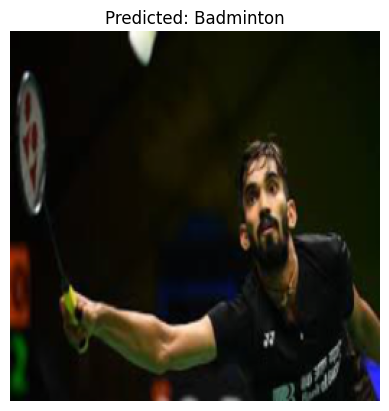

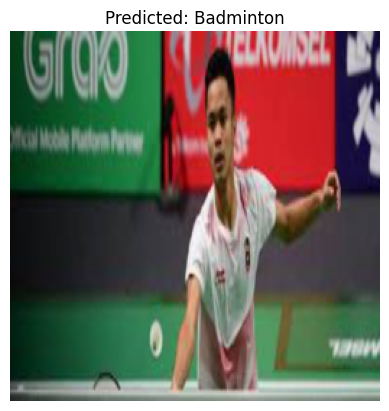

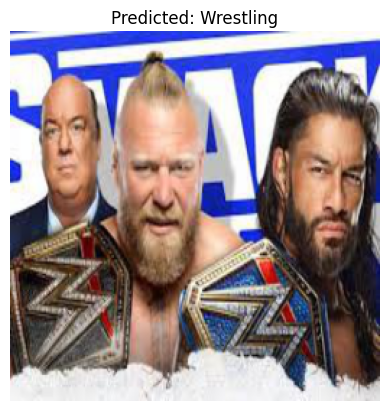

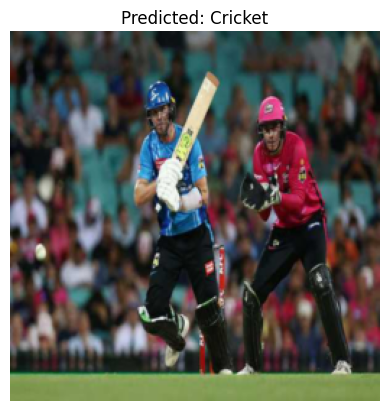

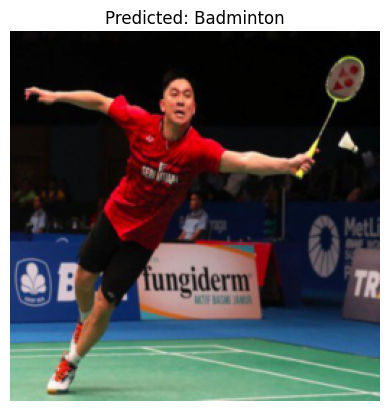

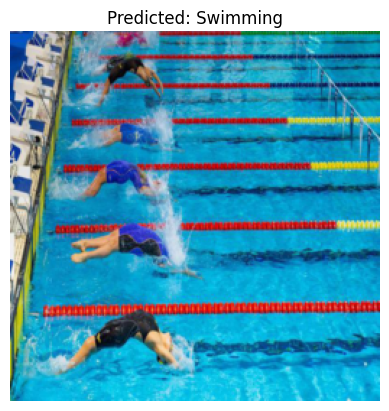

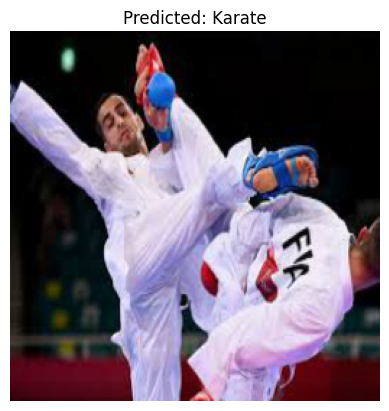

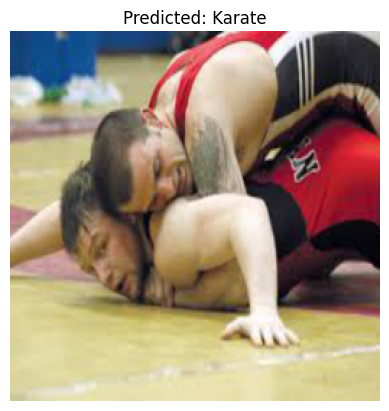

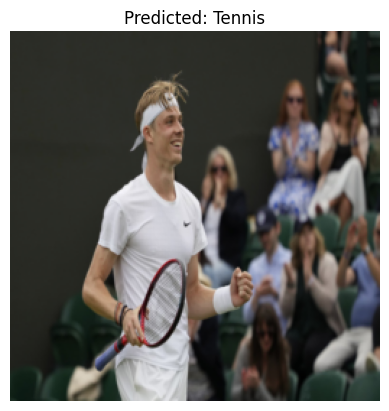

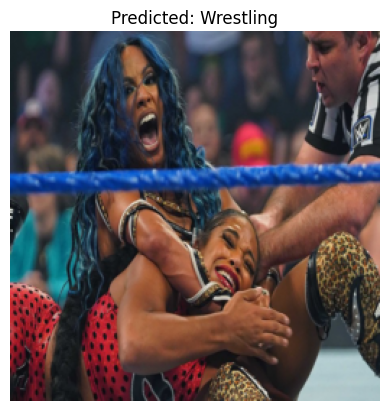

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def display_predictions_randomly(model, test_loader, device, label_mapping, num_images=10):
    model.eval()
    class_mapping = {v: k for k, v in label_mapping.items()}

    with torch.no_grad():
        all_images = []
        all_predictions = []

        # Collect all images and predictions from the test loader
        for images in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted_labels = torch.max(outputs.data, dim=1)

            all_images.extend(images.cpu().numpy())  # Store all images in CPU for easy access
            all_predictions.extend(predicted_labels.cpu().numpy())  # Store predictions

        # Randomly select indices
        selected_indices = random.sample(range(len(all_images)), min(num_images, len(all_images)))

        # Display the randomly selected images
        for idx in selected_indices:
            img = all_images[idx].transpose((1, 2, 0))
            # Unnormalize the image
            img = np.clip(img * np.array([0.229, 0.224, 0.225]) +
                          np.array([0.485, 0.456, 0.406]), 0, 1)

            plt.imshow(img)
            plt.title(f'Predicted: {class_mapping[all_predictions[idx]]}')
            plt.axis('off')  # Turn off axis
            plt.show()  # Show each image one by one

display_predictions_randomly(model, test_loader, device, label_mapping, num_images=10)
